In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_frame = pd.read_csv('/Users/rakadeb/Desktop/Data_Analysis/Global YouTube Statistics.csv', encoding='latin1')  # Replace with actual dataset path

In [3]:
print(data_frame.head())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

In [4]:
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [5]:
print(data_frame.describe())

            rank   subscribers   video views        uploads  video_views_rank  \
count  995.00000  9.950000e+02  9.950000e+02     995.000000      9.940000e+02   
mean   498.00000  2.298241e+07  1.103954e+10    9187.125628      5.542489e+05   
std    287.37606  1.752611e+07  1.411084e+10   34151.352254      1.362782e+06   
min      1.00000  1.230000e+07  0.000000e+00       0.000000      1.000000e+00   
25%    249.50000  1.450000e+07  4.288145e+09     194.500000      3.230000e+02   
50%    498.00000  1.770000e+07  7.760820e+09     729.000000      9.155000e+02   
75%    746.50000  2.460000e+07  1.355470e+10    2667.500000      3.584500e+03   
max    995.00000  2.450000e+08  2.280000e+11  301308.000000      4.057944e+06   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count    879.000000         962.000000                      9.390000e+02   
mean     386.053470         745.719335                      1.756103e+08   
std     1232.244746        1944.386561    

In [6]:
print(data_frame.isna().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [7]:
print(data_frame.duplicated().sum())

0


In [8]:
print(data_frame.columns)

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


In [9]:
# Set display format to avoid scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

category_subscribers_mean = data_frame.groupby('category')['subscribers'].mean()
print(category_subscribers_mean)

# Sort in descending order
category_subscribers_mean.sort_values(ascending=False, inplace=True)
print(category_subscribers_mean)

category
Autos & Vehicles        17850000
Comedy                  20123188
Education               26542222
Entertainment           21403320
Film & Animation        28584783
Gaming                  20852128
Howto & Style           19390000
Movies                  25650000
Music                   25717822
News & Politics         20630769
Nonprofits & Activism   27750000
People & Blogs          21056061
Pets & Animals          18100000
Science & Technology    18617647
Shows                   41615385
Sports                  27109091
Trailers                39000000
Travel & Events         12500000
Name: subscribers, dtype: float64
category
Shows                   41615385
Trailers                39000000
Film & Animation        28584783
Nonprofits & Activism   27750000
Sports                  27109091
Education               26542222
Music                   25717822
Movies                  25650000
Entertainment           21403320
People & Blogs          21056061
Gaming                  

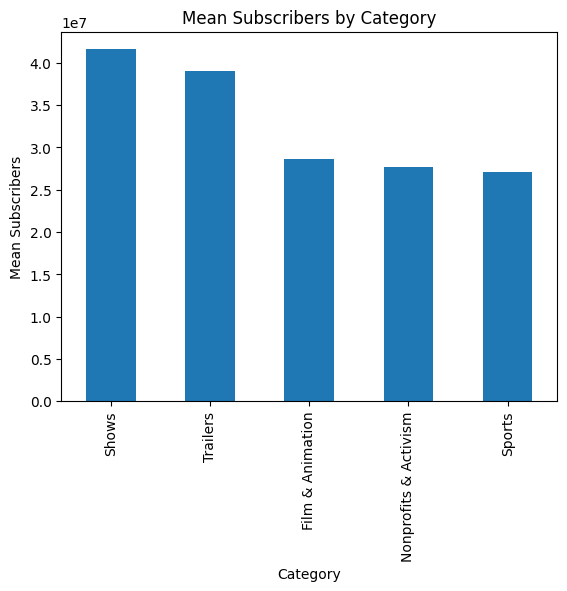

In [10]:
category_subscribers_mean.head(5).plot(kind='bar')
plt.title('Mean Subscribers by Category')
plt.xlabel('Category')
plt.ylabel('Mean Subscribers')
plt.xticks(rotation=90)
plt.show()

In [12]:
channel_type_counts = data_frame['channel_type'].value_counts()
print(channel_type_counts)

channel_type
Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64


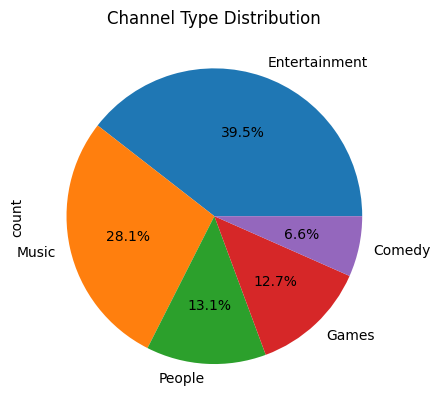

In [13]:
channel_type_counts.head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Channel Type Distribution')
plt.show()

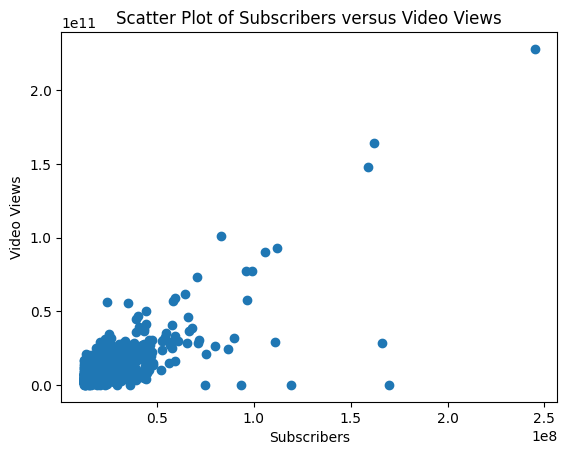

In [14]:
plt.scatter(data_frame['subscribers'], data_frame['video views'])
plt.title('Scatter Plot of Subscribers versus Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.show()

Country
United States           7329500000
India                   4310600000
Brazil                  1221800000
United Kingdom           917400000
Mexico                   626900000
Indonesia                534100000
South Korea              481700000
Russia                   407200000
Thailand                 386500000
Spain                    385100000
Canada                   363900000
Argentina                328500000
Colombia                 264500000
Philippines              240100000
Japan                    189100000
Saudi Arabia             179100000
Australia                172000000
Pakistan                 155400000
United Arab Emirates     148200000
Ukraine                  125600000
Germany                  116400000
Turkey                    91600000
Chile                     87200000
France                    83900000
Jordan                    67000000
Sweden                    63000000
Singapore                 59700000
Netherlands               58100000
Vietnam     

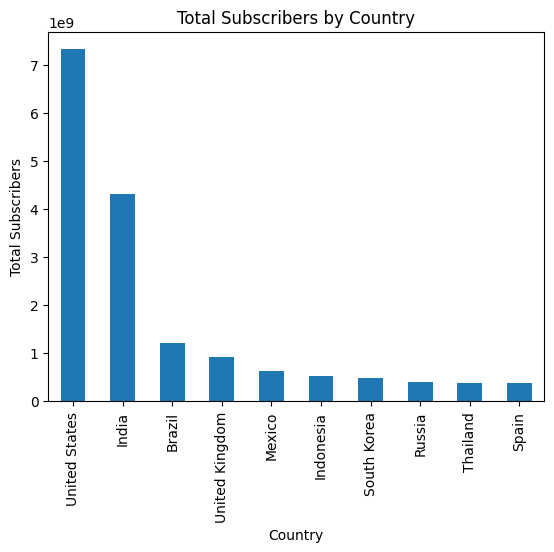

In [16]:
country_subscribers_total = data_frame.groupby('Country')['subscribers'].sum().sort_values(ascending=False)
print(country_subscribers_total)

# Bar plot for top 10 countries
country_subscribers_total.head(10).plot(kind='bar')
plt.title('Total Subscribers by Country')
plt.xlabel('Country')
plt.ylabel('Total Subscribers')
plt.xticks(rotation=90)
plt.show()

In [18]:
created_year_subscribers = data_frame.groupby('created_year')['subscribers'].mean().sort_values(ascending=True)
print(created_year_subscribers)

created_year
2022   13640000
2021   18573913
2019   18639394
2017   18666176
2014   20618367
2010   20670833
2015   21247945
2020   21350000
2011   21800000
2018   23060870
2016   23101299
2009   23105769
2008   23652174
2012   24038235
2013   24527632
2007   24902041
2005   25829167
2006   31884615
1970   36300000
Name: subscribers, dtype: float64


In [19]:
channel_type_views_rank = data_frame.groupby('channel_type')['video_views_rank'].median().sort_values(ascending=False)
print(channel_type_views_rank)

channel_type
Autos           3468229
Tech               2420
Games              1944
People             1868
Howto              1574
Nonprofit          1538
Sports             1186
Comedy             1033
Film                880
Entertainment       796
News                612
Education           538
Music               385
Animals             136
Name: video_views_rank, dtype: float64


In [20]:
country_subscribers_30days = data_frame.groupby('Country')['subscribers_for_last_30_days'].max().sort_values(ascending=False)
print(country_subscribers_30days)

Country
United States          8000000
Indonesia              5500000
United Arab Emirates   3400000
South Korea            3200000
Sweden                 3000000
Turkey                 2100000
India                  2000000
Italy                  2000000
Argentina              1900000
Russia                 1600000
Colombia               1600000
Pakistan               1300000
Kuwait                 1300000
Latvia                 1200000
Japan                  1100000
Brazil                 1100000
Germany                 900000
Spain                   800000
United Kingdom          600000
Mexico                  600000
Australia               600000
Chile                   500000
Philippines             500000
Saudi Arabia            500000
Canada                  400000
Thailand                300000
Jordan                  300000
Ecuador                 300000
Ukraine                 230000
Singapore               200000
Vietnam                 200000
Netherlands             200000


In [21]:
created_month_subscribers = data_frame.groupby('created_month')['subscribers'].sum()
print(created_month_subscribers)

created_month
Apr    1581200000
Aug    1813600000
Dec    1577300000
Feb    1533800000
Jan    2254600000
Jul    1922300000
Jun    1846400000
Mar    2320500000
May    1997700000
Nov    1930200000
Oct    1503700000
Sep    2496200000
Name: subscribers, dtype: int64


In [26]:
category_video_views_std = data_frame.groupby('category')['video views'].std()
print(category_video_views_std)

category
Autos & Vehicles         2964425984
Comedy                   6406251669
Education               25572139026
Entertainment           10128204611
Film & Animation        10899550881
Gaming                   5835933598
Howto & Style            4300326961
Movies                   3353301875
Music                   17782784424
News & Politics          5165961805
Nonprofits & Activism    2698145850
People & Blogs          12510420847
Pets & Animals           6475165093
Science & Technology     2937981619
Shows                   43723894662
Sports                  21703831459
Trailers                 1382496086
Travel & Events                 NaN
Name: video views, dtype: float64


In [29]:
country_unemployment_min = data_frame.groupby('Country')['Unemployment rate'].min().sort_values(ascending=True)
print(country_unemployment_min)

Country
Thailand                 1
Cuba                     2
Vietnam                  2
Philippines              2
Kuwait                   2
Japan                    2
United Arab Emirates     2
Germany                  3
Netherlands              3
Peru                     3
Malaysia                 3
Mexico                   3
United Kingdom           4
Ecuador                  4
El Salvador              4
Singapore                4
South Korea              4
Bangladesh               4
China                    4
Pakistan                 4
Switzerland              5
Russia                   5
Indonesia                5
Australia                5
India                    5
Canada                   6
Saudi Arabia             6
Sweden                   6
Latvia                   7
Finland                  7
Chile                    7
Samoa                    8
France                   8
Venezuela                9
Ukraine                  9
Morocco                  9
Colombia            

In [30]:
channel_type_uploads = data_frame.groupby('channel_type')['uploads'].sum()
print(channel_type_uploads)

channel_type
Animals            42868
Autos                949
Comedy             81722
Education         146355
Entertainment    3345035
Film              114654
Games             399473
Howto              79417
Music             424950
News             3989151
Nonprofit         205824
People            117424
Sports            158995
Tech               33780
Name: uploads, dtype: int64


In [32]:
geo_group = data_frame.groupby(['Latitude', 'Longitude']).size()
print(geo_group)

Latitude  Longitude
-38       -64           13
-36       -72            3
-25       134            9
-14       -52           62
          -172           1
-9        -75            1
-2        -78            2
-1        114           28
1         104            3
4         102            1
5         -74           11
6         -67            1
13        122           12
          -60            1
14        -89            1
          108            3
16        101           18
21        79           168
22        -78            1
23        54             7
24        -103          33
          90             1
          45             9
27        31             2
29        47             1
30        69             6
31        36             3
32        -7             1
33        44             2
34        68             1
36        104            1
          128           17
          138            5
37        -96          313
39        35             4
40        -4            22
42      

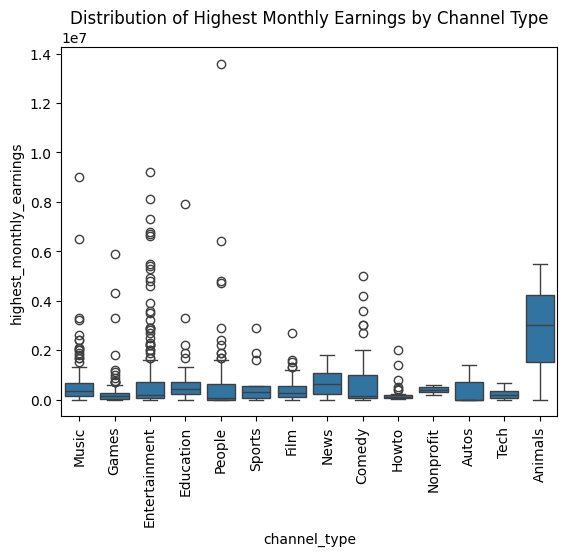

In [33]:
sns.boxplot(x='channel_type', y='highest_monthly_earnings', data=data_frame)
plt.title('Distribution of Highest Monthly Earnings by Channel Type')
plt.xticks(rotation=90)
plt.show()

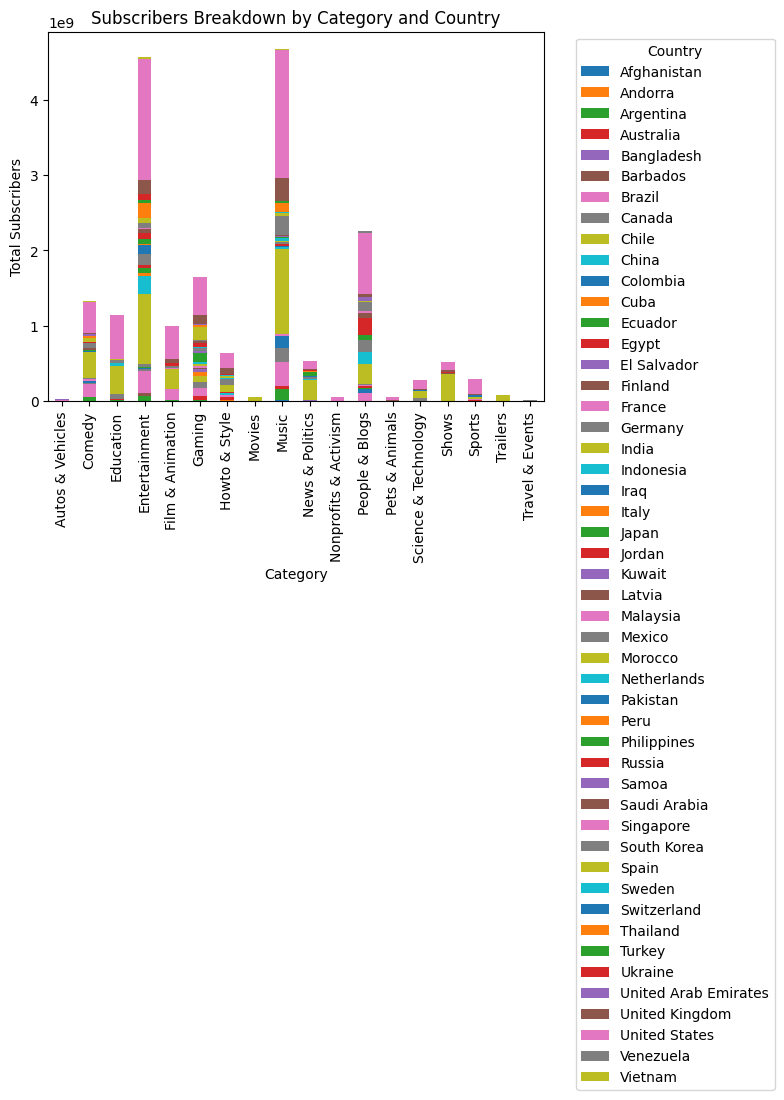

In [34]:
category_country_subscribers = data_frame.groupby(['category', 'Country'])['subscribers'].sum().unstack()
category_country_subscribers.plot(kind='bar', stacked=True)
plt.title('Subscribers Breakdown by Category and Country')
plt.xlabel('Category')
plt.ylabel('Total Subscribers')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

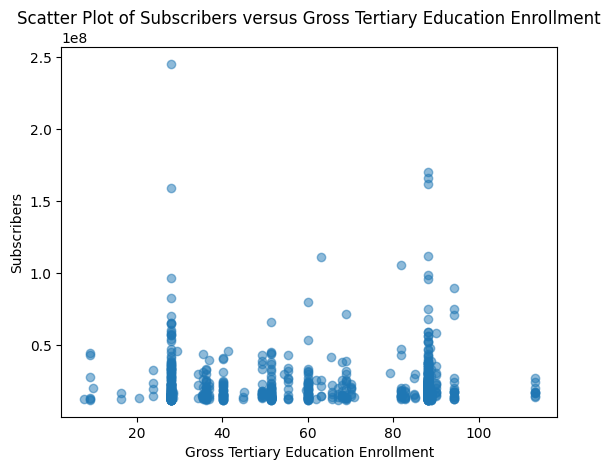

In [36]:
plt.scatter(data_frame['Gross tertiary education enrollment (%)'], data_frame['subscribers'], alpha=0.5)
plt.title('Scatter Plot of Subscribers versus Gross Tertiary Education Enrollment')
plt.xlabel('Gross Tertiary Education Enrollment')
plt.ylabel('Subscribers')
plt.show()

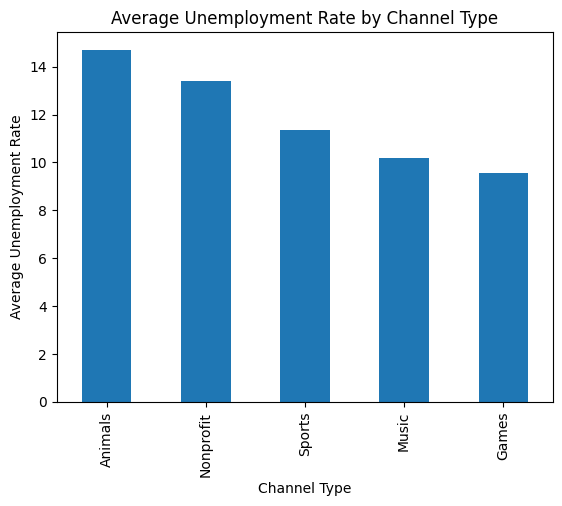

In [38]:
channel_type_unemployment = data_frame.groupby('channel_type')['Unemployment rate'].mean().sort_values(ascending=False).head(5)
channel_type_unemployment.plot(kind='bar')
plt.title('Average Unemployment Rate by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=90)
plt.show()

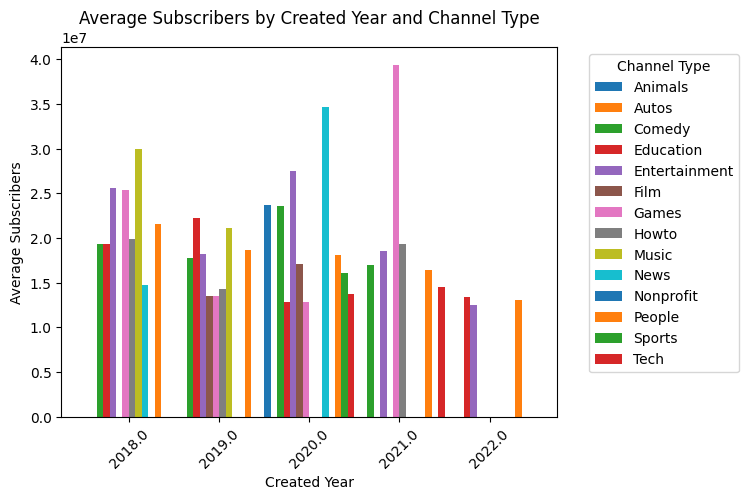

In [39]:
year_channel_subscribers = data_frame.groupby(['created_year', 'channel_type'])['subscribers'].mean().unstack().tail(5)
year_channel_subscribers.plot(kind='bar', width=1)
plt.title('Average Subscribers by Created Year and Channel Type')
plt.xlabel('Created Year')
plt.ylabel('Average Subscribers')
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

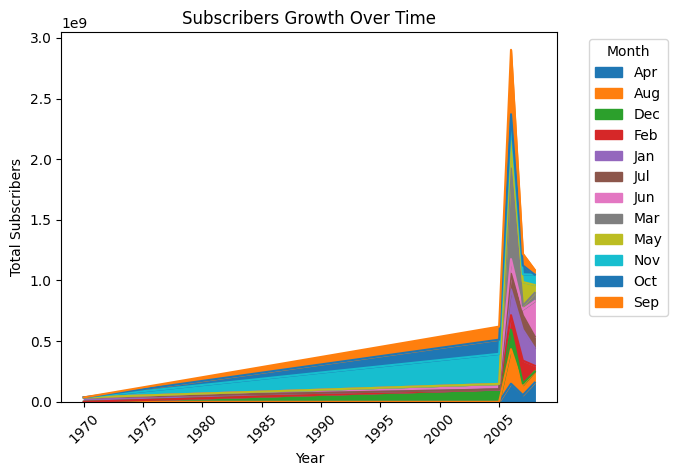

In [40]:
year_month_subscribers = data_frame.groupby(['created_year', 'created_month'])['subscribers'].sum().unstack().head(5)
year_month_subscribers.plot(kind='area', stacked=True)
plt.title('Subscribers Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Total Subscribers')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

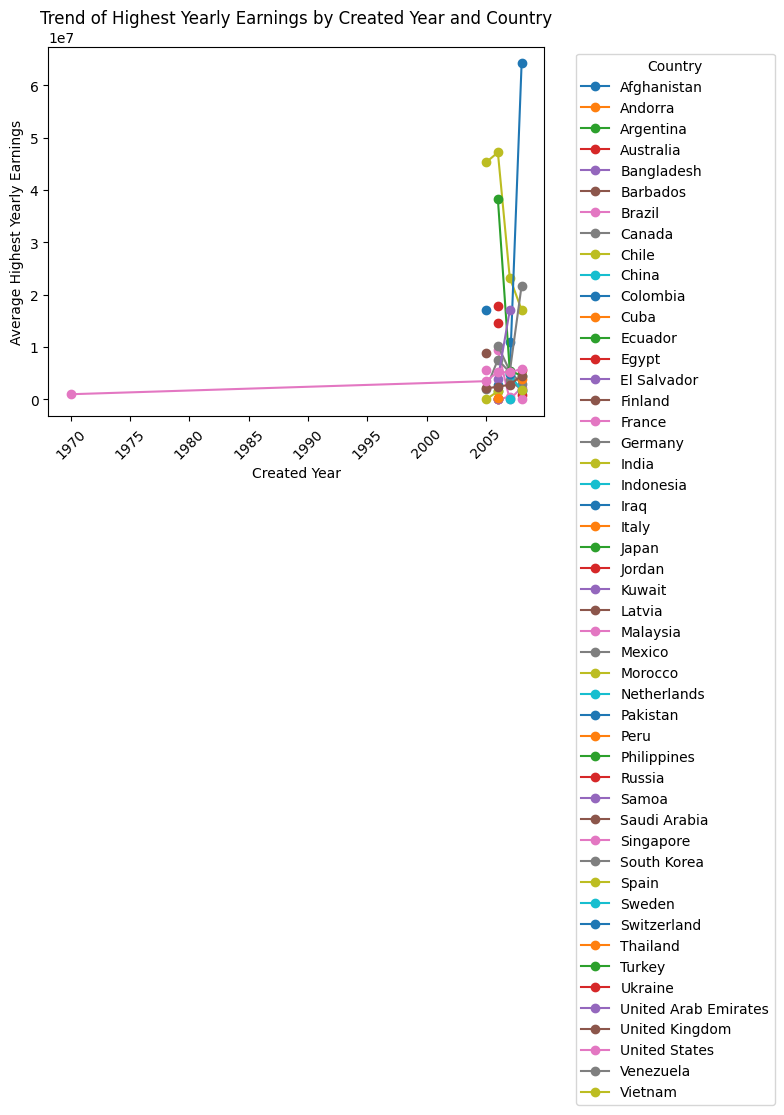

In [41]:
year_country_earnings = data_frame.groupby(['created_year', 'Country'])['highest_yearly_earnings'].mean().unstack().head(5)
year_country_earnings.plot(kind='line', marker='o')
plt.title('Trend of Highest Yearly Earnings by Created Year and Country')
plt.xlabel('Created Year')
plt.ylabel('Average Highest Yearly Earnings')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [56]:
category_highest_monthly_earnings_sum = data_frame.groupby('category')['highest_monthly_earnings'].sum().sort_values(ascending=False)


In [57]:
category_highest_monthly_earnings_sum 

category
Entertainment           150056865
Music                   111564524
People & Blogs           72183154
Comedy                   46113543
Film & Animation         33704283
Education                31283000
Shows                    26489600
Gaming                   25559111
News & Politics          16708431
Sports                    8876300
Howto & Style             7711962
Science & Technology      3434735
Pets & Animals            3177729
Autos & Vehicles          2172700
Movies                     909400
Nonprofits & Activism      780800
Trailers                   723800
Travel & Events            124000
Name: highest_monthly_earnings, dtype: float64

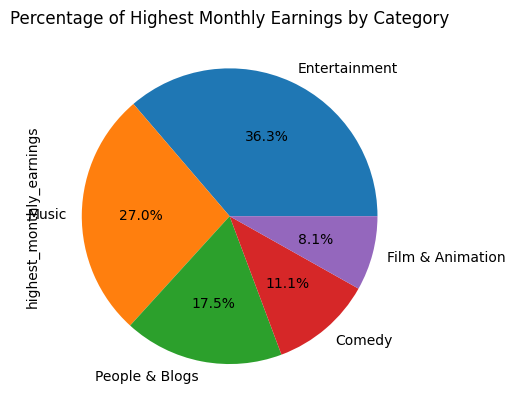

In [58]:
category_highest_monthly_earnings_sum.head().plot(kind="pie",autopct='%1.1f%%')
plt.title('Percentage of Highest Monthly Earnings by Category')
plt.show()

In [61]:
channel_created_subscribers_mean = data_frame.groupby(['channel_type', 'created_year'])['subscribers_for_last_30_days'].mean().unstack().head(10)

In [62]:
channel_created_subscribers_mean

created_year,1970,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
channel_type,,,,,,,,,,,,,,,,,,,
Animals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600000,NaN,NaN,NaN,NaN,NaN,1100000,NaN,NaN
Autos,NaN,NaN,2,500000,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Comedy,NaN,400000,100000,100000,200000,400000,NaN,50000,NaN,100000,1166667,150000,700000,100000,200050,1000000,1200000,600000,NaN
Education,NaN,NaN,700000,NaN,200000,100000,200000,200000,350000,283333,550000,200000,233333,200000,200000,100000,300000,NaN,300000
Entertainment,300000,325000,306250,342857,450000,480000,212575,442857,760000,233334,200000,300000,830001,700000,230769,160000,1212500,580000,500000
Film,NaN,1,333333,NaN,100000,NaN,NaN,225008,300000,350000,342857,250000,250000,600000,NaN,500000,450500,NaN,NaN
Games,NaN,100000,338,50006,100000,200000,3,150000,376923,245455,260000,660716,357143,100003,151000,NaN,750000,NaN,NaN
Howto,NaN,500000,NaN,NaN,NaN,100000,100000,NaN,NaN,NaN,NaN,100000,100000,100000,633333,100000,NaN,300000,NaN
Music,NaN,160000,433334,146160,185385,153846,175000,158829,200000,400000,230769,125016,240010,300000,300000,50005,NaN,NaN,NaN


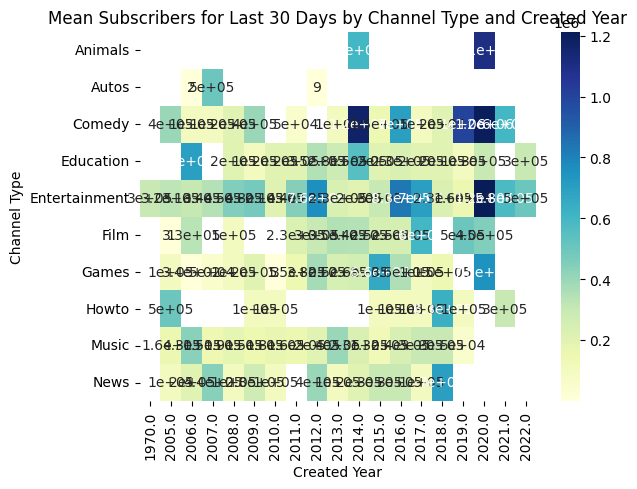

In [63]:
sns.heatmap(channel_created_subscribers_mean, cmap='YlGnBu', annot=True)
plt.title('Mean Subscribers for Last 30 Days by Channel Type and Created Year')
plt.xlabel('Created Year')
plt.ylabel('Channel Type')
plt.show()

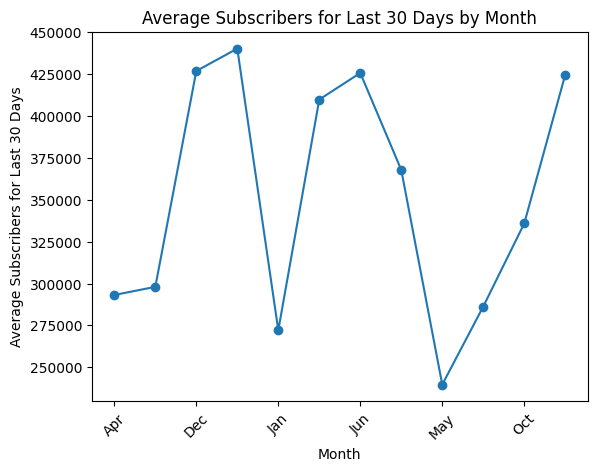

In [65]:
month_subscribers_30days = data_frame.groupby('created_month')['subscribers_for_last_30_days'].mean()
month_subscribers_30days.plot(kind='line', marker='o')
plt.title('Average Subscribers for Last 30 Days by Month')
plt.xlabel('Month')
plt.ylabel('Average Subscribers for Last 30 Days')
plt.xticks(rotation=45)
plt.show()